# Project: TSF_GRIP EDA For SampleSuperStore

## Auther: Menna Tallah Salah Selim
<ul> 
<li><a href="#wrangling">Data Wrangling</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li> 
</ul>

### Question(s) for Analysis:
 1- What is the weak areas where you can work to make more profit?
 
 2- What is the strong areas that has maximum profit? 
 
 3- What is the country that has best sales?
 
 4- How many region offers the highest discount?


 <a id='wrangling'></a>
## Data Wrangling

In [61]:
# importing packages
from pandas import *
# loading Data
df=read_csv('E:\GetHub\EDA-For-SampleSuperStore\SampleSuperstore.csv')

### lets see first 5 rows

In [46]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### lets explore column’s Data type

In [63]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### lets see last 5 rows

In [64]:
df.tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### lets see the dimensions of the dataFram

In [65]:
print("data fram has dimension 'row*columns' ",df.shape)

data fram has dimension 'row*columns'  (9994, 13)


###### this data frame consists of 9994 rows and 13 columns

### some information about our data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### check for missing values in each column

In [67]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###### good, there is no null data

### check for duplicates rows

In [68]:
df.duplicated().sum()

17

######  here we found duplicated data so we will drop it

# Data Cleaning

### drop duplicated rows

In [69]:
df.drop_duplicates(keep="first" , inplace=True)

### check for updates

In [70]:
df.duplicated().sum()

0

###### well, we got rid of duplicated data  

<a id='eda'></a>
# Exploratory Data Analysis (EDA)

### lets see some statistics for each column 

In [71]:
df.describe() 

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### Describtion of non numerical columns

In [72]:
df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


 ### what is the weak areas where you can work to make more profit 

In [73]:
mn= df['Profit'].min()
out_min=df[df['Profit']==mn]
out_min

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


###### so we will  work on Ohio state to acheive more profits 

 ### what is the strong areas that has maximum profit 

In [74]:
mx= df['Profit'].max()
out_max=df[df['Profit']==mx]
out_max

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


### country that has best sales 

In [75]:
mx_sal= df['Sales'].max()
out_max_sal=df.query("Sales==@mx_sal")
out_max_sal


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [76]:
df[df['Profit']==df['Profit'].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


###### country that has minimum profit : United States	, state:Ohio , city: Lancaster

#### visualization

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .express as ex
import warnings
warnings.filterwarnings('ignore')

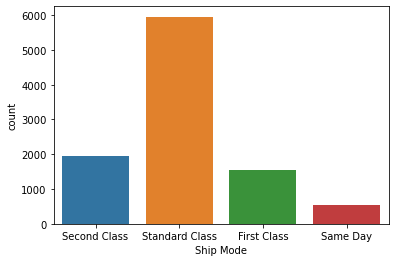

In [78]:
sns.countplot(df['Ship Mode'])
plt.show()

###### The most frequent type of 'ship mode ' is   standard class

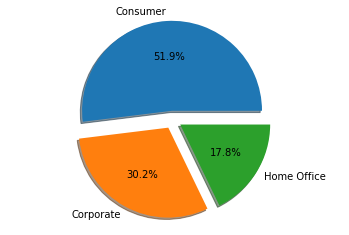

In [79]:
Seg_count=df['Segment'].value_counts()
plt.pie(Seg_count,labels=Seg_count.index, explode = [0.1,0.1,0.1], autopct ='%1.1f%%' ,shadow = True)
plt.axis('equal')
plt.show()

######  consumer is the most frequent type of segments

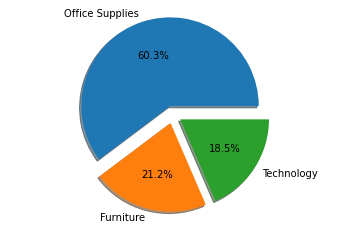

In [80]:
Seg_count=df['Category'].value_counts()
plt.pie(Seg_count,labels=Seg_count.index, explode = [0.1,0.1,0.1], autopct ='%1.1f%%' ,shadow = True)
plt.axis('equal')
plt.show()

######  office supplies is the most frequent type of categories

In [81]:
fig=ex.bar(df,x=df['State'],y=df['Sales'],color='Region',text='Profit')
fig.show() 

######  california and new york are the best sales between states

In [37]:
most_sales_profit=df.groupby('State')['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)
most_sales_profit

,Sales,Profit
State,,
California,457576.2715,76330.7891
New York,310827.1510,74015.4622
Texas,170124.5418,-25750.9833
Washington,138560.8100,33368.2375
Pennsylvania,116496.3620,-15565.4035
Florida,89473.7080,-3399.3017
Illinois,80162.5370,-12601.6500
Ohio,77976.7640,-16959.3178
Michigan,75879.6440,24428.0903


###### California and New York are best sales and profit

In [44]:
most_discount_profit=df.groupby('State')['Discount','Profit'].sum().sort_values(by='Discount',ascending=False)
most_discount_profit

,Discount,Profit
State,,
Texas,364.24,-25750.9833
Pennsylvania,192.70,-15565.4035
Illinois,191.10,-12601.6500
Ohio,152.10,-16959.3178
California,145.60,76330.7891
Florida,114.65,-3399.3017
North Carolina,70.60,-7490.9122
Arizona,68.00,-3427.9246
New York,62.40,74015.4622


###### Texas is the highest state to offer discounts